<a href="https://colab.research.google.com/github/LoveIsDestiny/Deep_Learning/blob/main/images_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.images[0])
print(digits.target[0])
print(len(digits.images))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0
1797


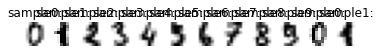

In [ ]:
data = list(zip(digits.images, digits.target))
for i , (image, label) in enumerate(data[:12]):
   # 5개 샘플만 출력
   plt.subplot(1, 12, i + 1)
   plt.axis("off")
   plt.imshow(image, cmap=plt.cm.gray_r)
   plt.title("sample{}:".format(label))

In [ ]:
# digits.image 는 8x8 행렬이고 data는 64 길이의 벡터로 저장
print(digits.data[0])

X = digits.data
Y = digits.target

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [ ]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device_2 = 'cuda'if torch.cuda.is_available() else 'cpu'
torch.manual_seed(1)
if device_2 == 'cuda' :
    torch.cuda.manual_seed_all(1)
print(device_2)

cpu


In [ ]:
X = torch.tensor(X, dtype = torch.float32)
Y = torch.tensor(Y, dtype = torch.int64)

print(X[0])

tensor([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10., 15.,
         5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4., 12.,  0.,
         0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.,  0.,  4.,
        11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5., 10., 12.,  0.,  0.,
         0.,  0.,  6., 13., 10.,  0.,  0.,  0.])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [ ]:
model = nn.Sequential(
          nn.Linear(64, 32, bias = True),
          nn.ReLU(),
          nn.Linear(32, 16, bias = True ),
          nn.ReLU(),
          nn.Linear(16, 10, bias = True)
          nn.ReLU()
).to(device_2)
Error_func = torch.nn.CrossEntropyLoss().to(device_2)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
optimizer.zero_grad()


0 2.378633499145508
100 0.10828381031751633
200 0.040248434990644455
300 0.022031627595424652
400 0.014446958899497986
500 0.010224651545286179
600 0.007615898735821247
700 0.00589272053912282
800 0.004701620899140835
900 0.003839345881715417
1000 0.003196945646777749
1100 0.0027140697930008173
1200 0.0023402650840580463
1300 0.002047202317044139
1400 0.0018119537271559238
1500 0.0016182041727006435
1600 0.001458798418752849
1700 0.00132481730543077
1800 0.0012109855888411403
1900 0.0011132466606795788
2000 0.0010285202879458666
2100 0.000954117625951767
2200 0.0008888477459549904
2300 0.0008310482953675091
2400 0.0007793870172463357
2500 0.0007332050590775907
2600 0.0006915921112522483
2700 0.0006539853638969362
2800 0.0006199459312483668
2900 0.0005888952291570604
3000 0.0005605138721875846
3100 0.0005344519740901887
3200 0.000510484678670764
3300 0.0004884309601038694
3400 0.0004679648263845593
3500 0.00044899279600940645
3600 0.00043134219595231116
3700 0.000414906331570819
3800 0.

Text(0, 0.5, 'Error')

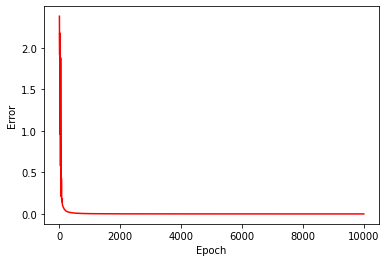

In [ ]:
Error_list = []

for epoch in range(10001):
    optimizer.zero_grad()
    Error = Error_func(model(X), Y)
    Error.backward()
    Error_list.append(Error.item())
    optimizer.step()
    
    if epoch % 100 == 0:
        print(epoch, Error.item())

plt.plot(Error_list, color = 'red')
plt.xlabel("Epoch")
plt.ylabel("Error")

In [ ]:
for i in range(50):
  print("학습 후 예측값 : {}, 타겟값 : {} ".format(model(X[i]), Y[i]))


학습 후 예측값 : tensor([33.0325,  0.0000,  0.0000,  0.0000,  0.0000, 10.0480,  8.1752,  6.0054,
         1.6410,  0.0000], grad_fn=<ReluBackward0>), 타겟값 : 0 
학습 후 예측값 : tensor([ 0.0000, 34.0488,  0.0000,  0.0000,  8.1260,  1.9466,  5.0240,  0.0000,
         7.8324,  1.6427], grad_fn=<ReluBackward0>), 타겟값 : 1 
학습 후 예측값 : tensor([ 0.0000,  9.9805, 26.3491,  0.0000,  0.0000,  0.0000, 11.2964,  0.0000,
        11.2680,  0.0000], grad_fn=<ReluBackward0>), 타겟값 : 2 
학습 후 예측값 : tensor([ 0.0000,  0.0000,  6.3168, 29.7585,  0.0000,  7.2879,  0.0000,  0.0000,
         1.7301, 12.2024], grad_fn=<ReluBackward0>), 타겟값 : 3 
학습 후 예측값 : tensor([ 1.9980,  0.0000,  0.0000,  0.0000, 37.2656,  0.0000, 15.9240,  0.0000,
         4.4435,  0.0000], grad_fn=<ReluBackward0>), 타겟값 : 4 
학습 후 예측값 : tensor([ 0.0000, 14.0502,  0.0000,  5.2888,  0.0937, 20.9564,  0.0000,  0.0000,
         2.0006, 15.9627], grad_fn=<ReluBackward0>), 타겟값 : 5 
학습 후 예측값 : tensor([ 6.8116,  9.9442,  0.0000,  0.0000, 12.7906,  0.0000, 28.8006, 